In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

In [4]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

In [5]:
train_images, test_images = train_images / 255.0, test_images / 255.0

In [6]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [7]:
model = models.Sequential()

In [8]:
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))

c:\MyFolder\Projects\University\ml-masters-sem3\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

In [10]:
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

In [11]:
model.add(layers.Flatten())

In [12]:
model.add(layers.Dense(128, activation='relu'))

In [13]:
model.add(layers.Dense(64, activation='relu'))

In [14]:
model.add(layers.Dense(10))

In [15]:
model.compile(optimizer='SGD',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [16]:
history = model.fit(
    train_images, 
    train_labels, 
    epochs=10, 
    validation_data=(test_images, test_labels)
)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.1696 - loss: 2.2245 - val_accuracy: 0.2820 - val_loss: 1.9744
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.3182 - loss: 1.8629 - val_accuracy: 0.2269 - val_loss: 2.3547
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.4184 - loss: 1.6019 - val_accuracy: 0.4617 - val_loss: 1.5083
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.4764 - loss: 1.4526 - val_accuracy: 0.5031 - val_loss: 1.3806
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.5191 - loss: 1.3371 - val_accuracy: 0.5268 - val_loss: 1.3064
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.5557 - loss: 1.2453 - val_accuracy: 0.5725 - val_loss: 1.2133
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.5850 - loss: 1.1710 - val_accuracy: 0.5888 - val_loss: 1.1641
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.6093 - 

In [17]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Точность на тестовых данных: {test_acc}")

313/313 - 3s - 9ms/step - accuracy: 0.6269 - loss: 1.0704
Точность на тестовых данных: 0.6269000172615051


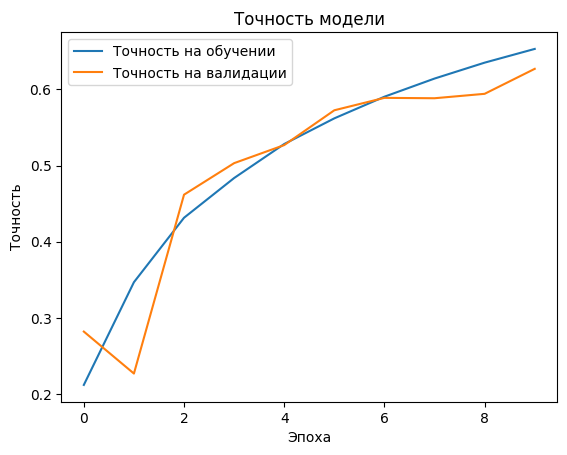

In [18]:
plt.plot(history.history['accuracy'], label='Точность на обучении')
plt.plot(history.history['val_accuracy'], label='Точность на валидации')
plt.title('Точность модели')
plt.xlabel('Эпоха')
plt.ylabel('Точность')
plt.legend()
plt.show()

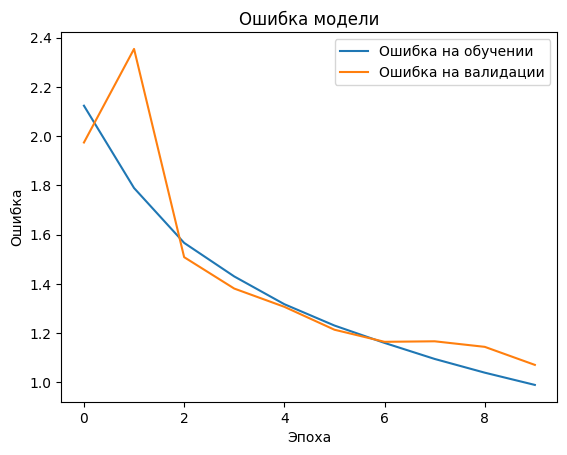

In [19]:
plt.plot(history.history['loss'], label='Ошибка на обучении')
plt.plot(history.history['val_loss'], label='Ошибка на валидации')
plt.title('Ошибка модели')
plt.xlabel('Эпоха')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

In [20]:
import random

In [21]:
index = random.randint(0, len(test_images) - 1)
img = test_images[index]
true_label = test_labels[index]

In [22]:
img_expanded = np.expand_dims(img, axis=0)  # Добавляем размерность для batch_size
predictions = model.predict(img_expanded)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [23]:
predicted_label = np.argmax(predictions)

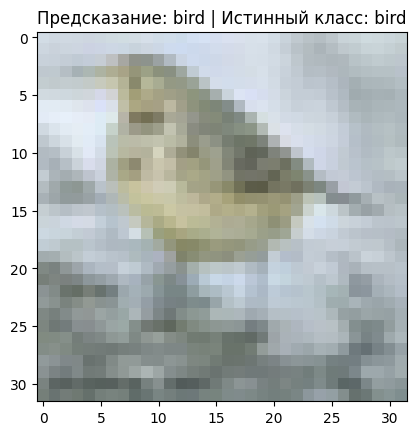

In [24]:
plt.imshow(img)
plt.title(f"Предсказание: {class_names[predicted_label]} | Истинный класс: {class_names[true_label[0]]}")
plt.show()